# LAYANAN KARTU KREDIT
Tujuan dari Notebook ini adalah untuk melakukan prediksi apakah seorang customer kartu kredit akan meninggalkan layanan bank atau tidak. Perhatikan bahwa sesuai dengan bahasan di buku, notebook ini menggunakan algoritme pembelajaran Decision Tree dengan mengubah jumlah data set pembelajaran.

Data diambil dari [situs Kaggle](https://www.kaggle.com/code/chetbounl/data-exploration-model-evaluation-on-bankchurners/data). Atribut data adalah sebagai berikut.
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Customer_Age: Demographic variable — Customer’s Age in Years
* Gender: Demographic variable — M=Male, F=Female
* Dependent_count: Demographic variable — Number of dependents
* Education_Level: Demographic variable — Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status: Demographic variable — Married, Single, Divorced, Unknown
* Income_Category: Demographic variable — Annual Income Category of the account holder (< 40K,40K,40K — 60K, 60K−60K−80K, 80K−80K−120K, > $120K, Unknown)
* Card_Category: Product Variable — Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book: Period of relationship with bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio




## Siapkan beberapa library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [2]:
# Unduh dataset untuk pembelajaran mesin
df = pd.read_csv('https://raw.githubusercontent.com/smirzap/AI-dengan-DL/main/data/BankChurners.csv')

## Explore Dataset dan Lakukan Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
# Dalam experimen ini, kita tidak memerlukan kolom 0, 16, 19, 21 dan 22
# Jadi kita hapus kolom-kolom tersebut
hapus_kolom = [0, 16, 19, 21, 22]
df.drop(df.columns[hapus_kolom], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
# Ubah nama kolom agar mudah diingat
df.rename(columns={'Attrition_Flag':'status'}, inplace=True)

## Siapkan Dataset untuk Pembelajaran Mesin

In [6]:
# Attrition_Flag adalah label data, yang menginfokan apakah customer telah meninggalkan layanan kartu kredit bank atau tidak
df['status'].value_counts()

# Terlihat jumlah data customer setiap 5 kali lebih banyak dibanding customer keluar

status
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [7]:
SAMPLE_SETIA = 8500
SAMPLE_KELUAR = 400
RANDOM_SEED = 2

In [8]:
df_keluar = df[df['status']=='Attrited Customer']
df_setia = df[df['status']=='Existing Customer']

len(df_setia), len(df_keluar)

(8500, 1627)

In [9]:
df_setia_sampled = df_setia.sample(SAMPLE_SETIA, random_state=RANDOM_SEED)
df_keluar_sampled = df_keluar.sample(SAMPLE_KELUAR, random_state=RANDOM_SEED)

len(df_setia_sampled), len(df_keluar_sampled)

(8500, 400)

In [10]:
dataset_sample = pd.concat([df_setia_sampled, df_keluar_sampled])
len(dataset_sample)

8900

## Eksperimen Pertama

Eksperimen ini dilakukan untuk melihat sifat adaptif dari pembelajaran mesin dan keakuratan model dalam hubungan jumlah pengalaman/dataset yang diberikan kepada mesin.

Terdapat dua eksperimen:

1.   Pada saat jumlah data customer keluar jauh lebih sedikit dibanding dengan jumlah data customer setia.
2.   Pada saat jumlah data kedua jenis customer tersebut hampir berimbang.



In [11]:
# Lihat sebaran jumlah customer berdasarkan status/label mereka
dataset_sample['status'].value_counts()

status
Existing Customer    8500
Attrited Customer     400
Name: count, dtype: int64

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score

In [13]:
# Pisahkan kolom label dengan kolom feature lainnya
X = dataset_sample.drop('status', axis=True)
y = dataset_sample['status']

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8900 entries, 1322 to 7336
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8900 non-null   int64  
 1   Gender                    8900 non-null   object 
 2   Dependent_count           8900 non-null   int64  
 3   Education_Level           8900 non-null   object 
 4   Marital_Status            8900 non-null   object 
 5   Income_Category           8900 non-null   object 
 6   Card_Category             8900 non-null   object 
 7   Months_on_book            8900 non-null   int64  
 8   Total_Relationship_Count  8900 non-null   int64  
 9   Months_Inactive_12_mon    8900 non-null   int64  
 10  Contacts_Count_12_mon     8900 non-null   int64  
 11  Credit_Limit              8900 non-null   float64
 12  Total_Revolving_Bal       8900 non-null   int64  
 13  Avg_Open_To_Buy           8900 non-null   float64
 14  Total_Tran

In [15]:
X = pd.get_dummies(X, drop_first=True) # Hot Encoding the category/string columns

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8900 entries, 1322 to 7336
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    8900 non-null   int64  
 1   Dependent_count                 8900 non-null   int64  
 2   Months_on_book                  8900 non-null   int64  
 3   Total_Relationship_Count        8900 non-null   int64  
 4   Months_Inactive_12_mon          8900 non-null   int64  
 5   Contacts_Count_12_mon           8900 non-null   int64  
 6   Credit_Limit                    8900 non-null   float64
 7   Total_Revolving_Bal             8900 non-null   int64  
 8   Avg_Open_To_Buy                 8900 non-null   float64
 9   Total_Trans_Amt                 8900 non-null   int64  
 10  Total_Trans_Ct                  8900 non-null   int64  
 11  Avg_Utilization_Ratio           8900 non-null   float64
 12  Gender_M                        8900

In [17]:
# Bagi dataset menjadi training dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [18]:
# Periksa jumlah data pada train dan test set
len(X_train), len(X_test)

(6230, 2670)

In [19]:
# Definisikan model Decision Tree
model = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_SEED)

In [20]:
# Lakukan pembelajaran dan pembentukan model dengan training set
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
# Lakukan evaluasi kinerja Model dengan menggunakan Test Set
prediksi = model.predict(X_test)

In [22]:
recall_score(y_test, prediksi, average=None)

array([0.28571429, 0.99288538])

In [23]:
from sklearn.tree import plot_tree
from sklearn import tree

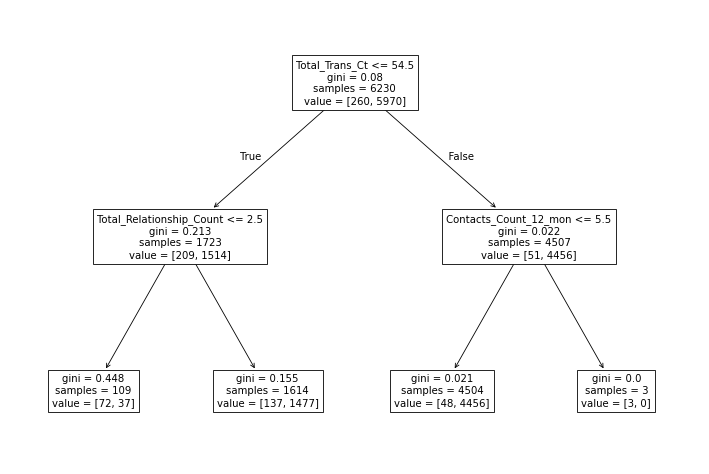

In [24]:
plt.figure(figsize=(15,10), dpi=60)
plot_tree(model, feature_names=X.columns);

In [25]:
# plt.figure(figsize=(15,10), dpi=150)
# plot_tree(model, feature_names=X.columns);
rules = tree.export_text(model)
print(rules)

|--- feature_10 <= 54.50
|   |--- feature_3 <= 2.50
|   |   |--- class: Attrited Customer
|   |--- feature_3 >  2.50
|   |   |--- class: Existing Customer
|--- feature_10 >  54.50
|   |--- feature_5 <= 5.50
|   |   |--- class: Existing Customer
|   |--- feature_5 >  5.50
|   |   |--- class: Attrited Customer



In [26]:
model.classes_

array(['Attrited Customer', 'Existing Customer'], dtype=object)

## Eksperimen Kedua

In [27]:
dataset_full = df.copy(deep=True)

In [28]:
# Pisahkan kolom label dengan kolom feature lainnya
X = dataset_full.drop('status', axis=True)
y = dataset_full['status']

In [29]:
X = pd.get_dummies(X, drop_first=True) # Hot Encoding the category/string columns

In [30]:
# Bagi dataset menjadi training dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [31]:
# Definisikan model Decision Tree
model2 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_SEED)

In [32]:
# Lakukan pembelajaran dan pembentukan model dengan training set
model2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
# Lakukan evaluasi kinerja Model dengan menggunakan Test Set
prediksi = model2.predict(X_test)

In [34]:
rules = tree.export_text(model2)
print(rules)

|--- feature_10 <= 54.50
|   |--- feature_7 <= 615.50
|   |   |--- class: Attrited Customer
|   |--- feature_7 >  615.50
|   |   |--- class: Existing Customer
|--- feature_10 >  54.50
|   |--- feature_9 <= 5361.50
|   |   |--- class: Existing Customer
|   |--- feature_9 >  5361.50
|   |   |--- class: Existing Customer



In [35]:
rules = tree.export_text(model2)
print(rules)

|--- feature_10 <= 54.50
|   |--- feature_7 <= 615.50
|   |   |--- class: Attrited Customer
|   |--- feature_7 >  615.50
|   |   |--- class: Existing Customer
|--- feature_10 >  54.50
|   |--- feature_9 <= 5361.50
|   |   |--- class: Existing Customer
|   |--- feature_9 >  5361.50
|   |   |--- class: Existing Customer



In [36]:
recall_score(y_test, prediksi, average=None)

array([0.4989648, 0.9643975])